  Determinar los valores extremos de $z(x,y)=(x-3)^2 + (y+5)^2$ usando el criterio de la segunda derivada y corroborarlo con la grafica.

In [43]:
import numpy as np
import sympy as sym


In [44]:
def z(x,y):
    return (x-3)**2+(y+5)**2


In [45]:
sym.var('x', real=True)

sym.var('y', real=True)

y

In [46]:
dz_x=sym.diff(z(x,y),x)
dz_y=sym.diff(z(x,y),y)

In [47]:
c=sym.solve([dz_x,dz_y],[x,y])

In [48]:
dz_x2=sym.diff(z(x,y),x,2)
dz_y2=sym.diff(z(x,y),y,2)
dz_xy=sym.diff(z(x,y),x,y)
dz_x2,dz_y2,dz_xy

(2, 2, 0)

In [49]:
Hz=sym.Matrix([[dz_x2,dz_xy],[dz_xy,dz_y2]])
Hz

Matrix([
[2, 0],
[0, 2]])

In [50]:
Hz.eigenvals()

{2: 2}

In [51]:
Hz.det()

4

##Programación Lineal
Ejemplo básico: Una farmacéutica desea fabricar un compuesto nutritivo a base de dos productos A y B. El producto A contiene 30% de proteínas, un 1% de grasas y un 10% de azúcares. El producto B contiene un 5% de proteínas, 7% gramos de grasa y 1% de azucar.

Restriciciones. Menos de 25 proteínas, 6 grasas y 30 de azucarez
Funcion a minimizar es 0.6xa+0.2xb



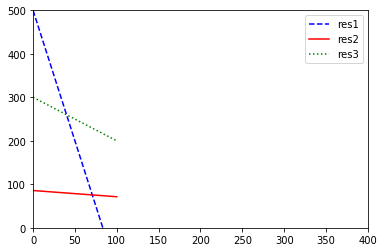

In [62]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt

#definir funciones de restricción y de costo 
def res1(xA):
    return (-25+0.3*xA)/-0.05

def res2(xA):
    return (-6+0.01*xA)/-0.07

def res3(xA):
    return (-30+0.1*xA)/-0.1
#Evaluar funciones

xA=np.linspace(0,100,400)

#Graficar
plt.plot(xA,res1(xA),'b--',label='res1')
plt.plot(xA,res2(xA),'r-',label='res2')
plt.plot(xA,res3(xA),'g:',label='res3')
#plt.axis([0,400,0,500])
plt.legend(loc='best')
plt.show()

In [63]:
import sympy as sym

sym.var('x')
c1=sym.solve(res1(x)-res3(x),x)
c2=sym.solve(res2(x)-res3(x),x)
c1,c2

([40.0000000000000], [250.000000000000])

In [64]:
res3(40),res3(250)

(260.0, 50.0)

In [65]:
def obj1(xA,xB):
    return 0.6*xA+0.2*xB
obj1(40,260),obj1(250,50)

(76.0, 160.0)

# Ejemplo 2

Funcion objetivo -600xcam-200xcar
7xcam+2xcar =<300
3xcam+3xcar=<270


## Libreria Scipy
A Monica le toma 30 minutos hacer un par de aretes y una hora haver una cadenita, y como Monica también estudia solo dispone de 10 horas a la semana para hacer joyas. Por otra parte , el material que compra solo le alcanza para hacer 15 unidades de joyas a la semana. La utilidad que 
le deja la venta de joyas es de $15 en cada par de aretes y $20 en cada cadenita. 
¿Cuantos pares de aretes y cuantas cadenitas deberia de hacwer para maximizar su utilidad?


In [23]:
import scipy.optimize as opt
import numpy as np

A=np.array([[.5,1],[1,1]])
B=np.array([10,15])
C=np.array([-15,-20])

resultado=opt.linprog(C,A,B)

resultado

     fun: -250.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([10.,  5.])

In [27]:
#Para multiplicar matrices usamos @
C@np.array([10,5])

-250

In [8]:
import scipy.optimize as opt
#opt.linprog?
A=np.array([[-0.3,-0.05],[-0.01,-0.07],[-0.1,-0.1]])
b=np.array([-25,-6,-30])
c=np.array([0.6,0.2])

resultado=opt.linprog(c,A,b)
resultado

     fun: 75.99999999999987
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([ 0. , 12.6,  0. ])
  status: 0
 success: True
       x: array([ 40., 260.])

Nave A: Se invierten 7 dias-operario, para fabricar un coche se precisan dos dias de operario

Nave B: Se invierten tres dias.operario tanto en carrocerias de comion como en coche


Por limitacion de mano de obra y maquinaria, la nave A dispone de 300 dias operario, y la nave B de 270 dias-operario
Si los beneficios que se obtienen por cada camion so0nd e 600 y cada automovil 200 ¿Cuantas unidades de cada uno deben de producirse para maximizar las ganancias?

Funcion objetivo: -600xcam-200xcar


restriciones:
    7xcam+2xcar=<300
    3xcam+3xcar=<270

c=objetivo

A=restriciones(funcion)

B=Restriciones(resultado)

c[-600, -200]   A[[7,2][3,3]]   B[300,270] 

In [6]:
#Importar librerias
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt

A=np.array([[7,2],[3,3]])
B=np.array([300,270])
C=np.array([-600,-200])

unidades=opt.linprog(C,A,B)

unidades.x,#unidades.fun

(array([24., 66.]),)

In [36]:
import scipy.optimize as opt
import numpy as np
A=np.array([[1,1,1,0,0,0],[0,0,0,1,1,1],[-1,0,0,-1,0,0],[0,-1,0,0,-1,0],[0,0,-1,0,0,-1]])
B=np.array([500,400,-200,-300,-400])
C=np.array([50,60,10,25,40,20])

unidades=opt.linprog(C,A,B)
unidades.x











array([  0., 100., 400., 200., 200.,   0.])

In [45]:
#EJERCICIO 5 REPOSITORIO
import scipy.optimize as opt
import numpy as np
c=np.array([-11,-10,-6,-10,-7,-13])
a=np.array([[1,1,1,1,1,1],[-1,-1,0,-1,0,-1],[1,1,1,1,1,1],[0,1,1,0,1,0]])
b=np.array([750000,-375000,187500,262500])

unidades=opt.linprog(c,a,b)
unidades


     fun: 187500.0
 message: 'Optimization failed. Unable to find a feasible starting point.'
     nit: 1
  status: 2
 success: False
       x: nan

In [15]:
#ejercicio 5 
#objetivo = .0865x1+.0950x2+.10x3+.0875x4+.0925x5+0.09x6
#x1+x2+x4+x6=>375000
#0<=xi<=107500
#x1+x2+x3=<(750000)*.35

import numpy as np
import scipy.optimize as opt
#Cambio de signo para maximizar, cuando se tiene mayor o igual que
c=np.array([-.0865,-.0950,-.10,-.0875,-.0925,-0.09])
A=np.array([[-1,-1,0,-1,0,-1],[0,1,1,0,1,0]])
b=np.array([-375000,262500])

Ae=np.array([[1,1,1,1,1,1]])
be=np.array([750000])

limite=(0,750000/4)

res=opt.linprog(c,A,b,A_eq=Ae,b_eq=be,bounds=limite)

res.x,res.fun

(array([112500.,  75000., 187500., 187500.,      0., 187500.]), -68887.5)

# AJUSTE DE CURVAS

In [21]:
import numpy as np
import matplotlib.pyplot as plt
A=np.array([[1,3],[1,2]])
b=np.array([1,0])

x=np.linalg.inv(A)@b
x

array([-2.,  1.])

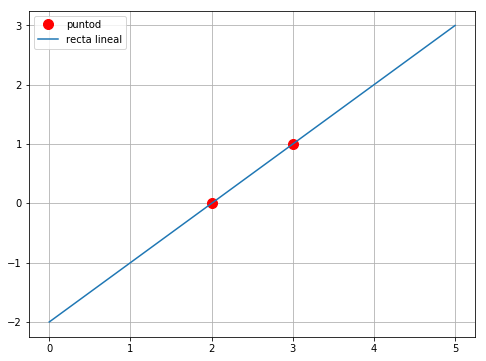

In [24]:
#graficar
px=[3,2]
py=[1,0]
plt.figure(figsize=(8,6))
plt.plot(px,py,'ro',ms=10,label='puntod')
xlin=np.linspace(0,5,100)
plt.plot(xlin,x[1]*xlin+x[0],label='recta lineal')
plt.legend(loc='best')
plt.grid()

In [25]:
A=np.array([[1,0,0],[1,1,1],[1,2,4]])
b=np.array([1,0,1])
beta=np.linalg.inv(A)@b
beta

array([ 1., -2.,  1.])

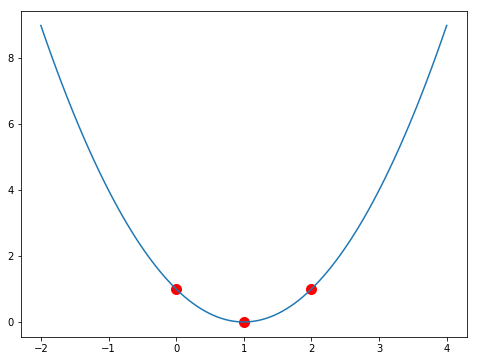

In [27]:
px=[0,1,2]
py=[1,0,1]

xlin=np.linspace(-2,4,100)
y=beta[2]*xlin**2+beta[1]*xlin+beta[0]

plt.figure(figsize=(8,6))
plt.plot(px,py,'ro',ms=10,label='Puntos')
plt.plot(xlin,y,label='Parabola ajustada')

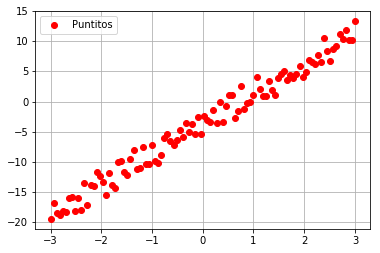

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-3,3,100)
y=5*x-6+5*np.random.rand(100)
plt.plot(x,y,"or",label='Puntitos')
plt.legend(loc='best')
plt.grid()

In [8]:
import scipy.optimize as opt
#opt.minimize? #suma de la diferencia elevada al cuadrado

def obj(beta,x,y):
    f=beta[0]+beta[1]*x #definimos la funcion
    return np.sum((y-f)**2) #sumamos todos los componente de la diferencia al cuadrado

In [9]:
beta0=[0,1] #valores iniciales para beta
res=opt.minimize(obj,beta0,args=(x,y))
res

      fun: 186.63848416676763
 hess_inv: array([[5.00000057e-03, 2.46348052e-11],
       [2.46348052e-11, 1.63366338e-03]])
      jac: array([ 1.90734863e-06, -1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([-3.75180941,  4.95602153])

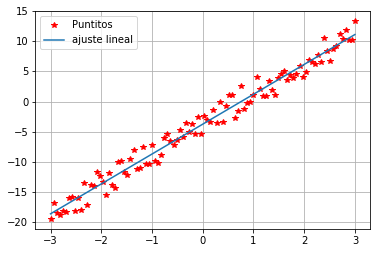

In [10]:
plt.plot(x,y,"*r",label='Puntitos')
plt.plot(x,res.x[0]+res.x[1]*x,label='ajuste lineal')
plt.legend(loc='best')
plt.grid()

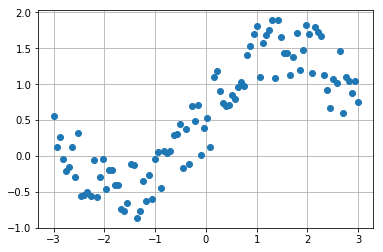

In [11]:
#Generamos 100 puntos ruidoso a partir de una senoidal
#dejamos la misma x

y=np.sin(x)+np.random.rand(100)
plt.plot(x,y,'o',label='datos(bolitas)')
plt.grid()

In [19]:
#definimos la funcion objetivo
def obj(beta,x,y,n):
    f=beta@[x**i for i in range(n+1)] #genera un polinomio de grado n
    return np.sum((y-f)**2)

In [20]:
#juste lineal
beta1=[0,1]
r1=opt.minimize(obj,beta1,args=(x,y,1))

#ajuste cuadratico
beta2=[0,1,1]
r2=opt.minimize(obj,beta2,args=(x,y,2))

#ajuste cúbico
beta3=[1,1,1,1]
r3=opt.minimize(obj,beta3,args=(x,y,3))

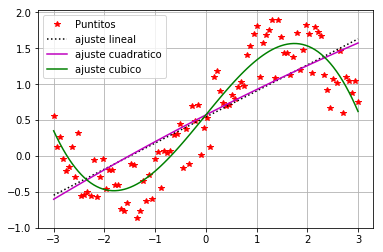

In [22]:
def f(beta,x,n):
    return beta@[x**i for i in range(n+1)]

plt.plot(x,y,"*r",label='Puntitos')
plt.plot(x,f(r1.x,x,1),'k:',label='ajuste lineal')
plt.plot(x,f(r2.x,x,2),'m',label='ajuste cuadratico')
plt.plot(x,f(r3.x,x,3),'g',label='ajuste cubico')
plt.legend(loc='best')
plt.grid()

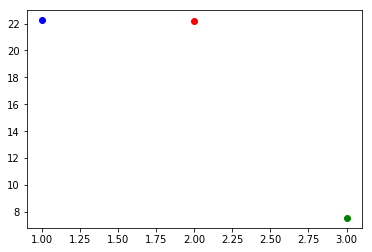

In [31]:
r1.fun,r2.fun,r3.fun #Calculo de errores de las regresiones

plt.plot(1,r1.fun,'ob',label='Error de ajuste lineal')
plt.plot(2,r2.fun,'or',label='Error de ajuste cuadratico')
plt.plot(3,r3.fun,'og',label='Error de ajuste cúbico')
plt.plot(4,r4.fun,'*k',label='Error de ajuste de grado cuatro')
plt.plot(5,r5.fun,'
         ',label='Error de ajuste de grado cinco)

In [32]:
#Ajuste de grado 4
beta4=[1,1,1,1]
r5=opt.minimize(obj,beta4,args=(x,y,5))
plt.plot(x,y,*r)

ValueError: shapes (4,) and (6,100) not aligned: 4 (dim 0) != 6 (dim 0)

In [15]:
#PROYECTO
import numpy as np
import scipy.optimize as opt
#Cambio de signo para maximizar, cuando se tiene mayor o igual que
c=np.array([-.0966,-.0683,-.0541,-.0351,-.0761,-0.0825])
A=np.array([[0,-1,-1,-1,0,0],[1,1,1,0,0,1],[1,1,1,1,1,1]])
b=np.array([-350000,600000,1000000])

#Ae=np.array([[1,1,1,1,1,1]])
#be=np.array([1000000])

limite=(0,1000000/5)

res=opt.linprog(c,A,b,bounds=limite)

res

     fun: -71720.0
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([50000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.])
  status: 0
 success: True
       x: array([200000., 200000.,      0., 200000., 200000., 200000.])